# ME 806 - Lesson 3

Neutron scattering. Legendre polynomials.

## Objectives

  - derive scattering kinematics in laboratory and center-of-mass frames
  - combine kinematics with isotropic scattering to define coupled angle/energy transfer function
  - express angular dependence using an expansion in the Legendre polynomials


# Scattering in the Laboratory (LAB) Frame

Consider neutron ($A=1$) incident on massive target (mass number $A$) as illustrated: 

<img src="lec3_lab_energy.png" alt="drawing" width="400"/>

Conservation of energy says

$$
  E = E' + E_A
$$

<img src="lec3_lab_momentum.png" alt="drawing" width="200"/>

Conservation of momentum says

$$
\begin{split}
 p = p' \cos \theta  + p_A \cos \phi \\
 0 = p' \sin \theta  - p_A \sin \phi \, .
\end{split}
$$

With  the relation $p^2 = 2mE$ and the use of the law of cosines to produce $p_A^2 = (p')^2 + p^2 - 2p'p \cos \theta$, one can show

$$
\boxed{
  E' = \frac{E}{(A+1)^2} (\cos \theta + \sqrt{A^2 - \sin^2 \theta})^2 \, .
}
$$

What are the *minimum* and *maximum* outgoing energies?

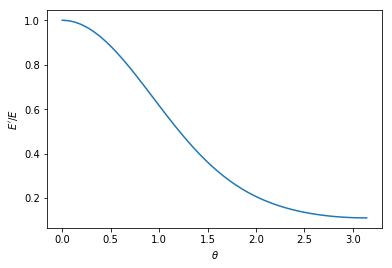

In [14]:
import numpy as np
import matplotlib.pyplot as plt
A = 2
theta = np.linspace(0, np.pi)
fraction_of_E = (1/(A+1)**2)*(np.cos(theta)+np.sqrt(A**2-np.sin(theta)**2))**2
plt.plot(theta, fraction_of_E)
plt.xlabel(r'$\theta$')
plt.ylabel("$E'/E$");

# Scattering in the Center of Mass (CM) Frame

Recap: we have one-to-one correspondence between $E'$ and $\theta$, but some analysis (and data) lives in the CM frame.

<img src="lec3_com_scatter.png" alt="drawing" width="300"/>

Momentum must be preserved between CM and LAB systems, i.e.,

$$
  (m + m_A) V_{cm} = mv + m_A V_A
$$

Assume $V_A = 0$, so that 

$$
   V_{cm} = \frac{v}{1 + A} \, ,
$$

$$
    v_c = v - V_{cm} = \frac{A}{1+A}v \, ,
$$

and

$$
 V_c = -V_{cm} = -\frac{1}{1+A}v \, .
$$

Conservation of energy yields $v_c = v_c'$ and $V_c = \frac{v}{1+A}$.

<img src="lec3_lab_to_com.png" alt="drawing" width="300"/>

Note that

$$
  v_c' \sin{\theta_c} = v' \sin{\theta}
$$

and

$$
 v'_c \cos \theta_c + v_{cm} = v' \cos \theta \, .
$$

It follows that

$$
  \boxed{\cos \theta = \frac{  A \cos \theta_c + 1 } {\sqrt{ A^2 + 2 A \cos \theta_c +1 }} } 
$$

and

$$
\boxed{\frac{E'}{E} = \frac{A^2 + 2A \cos \theta_c +1 }{(1+A)^2}} \, .
$$

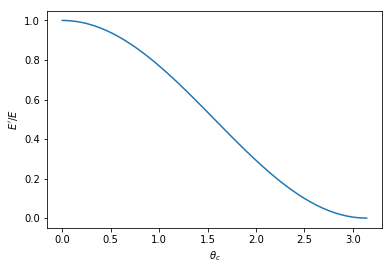

In [17]:
# E'/E vs theta_c
A = 1.001
theta_c = np.linspace(0, np.pi)
fraction_of_E = (A**2 + 2*A*np.cos(theta_c)+1) / (1+A)**2
plt.plot(theta_c, fraction_of_E)
plt.xlabel(r'$\theta_c$')
plt.ylabel("$E'/E$");

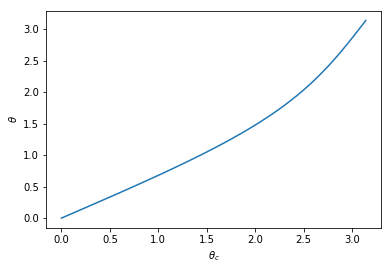

In [34]:
# theta vs theta_c
A = 2
cos_theta = (A*np.cos(theta_c)+1) / np.sqrt(A**2 + 2*A*np.cos(theta_c)+1)
plt.plot(theta_c, np.arccos(cos_theta))
plt.xlabel(r'$\theta_c$')
plt.ylabel(r'$\theta$');

# The Double-Differential Cross Section

Consider the double-differential scattering cross section

$$
\sigma_s(\hat{\mathbf{\Omega}}'\to\hat{\mathbf{\Omega}}, E'\to E) \, .
$$

Often, scattering depends only on the angle between $\hat{\mathbf{\Omega}}'$ and $\hat{\mathbf{\Omega}}$ (or its cosine), so we can write

$$
 \sigma_s(\hat{\mathbf{\Omega}}'\to\hat{\mathbf{\Omega}}, E'\to E) =  \frac{1}{2\pi} \sigma_s(\hat{\mathbf{\Omega}}'\cdot \hat{\mathbf{\Omega}}, E'\to E) =  \frac{1}{2\pi} \sigma_s(\mu, E'\to E) \, , 
$$

where $\mu = \hat{\mathbf{\Omega}}'\cdot \hat{\mathbf{\Omega}}$.

The factor of $2\pi$ comes from
$$
\sigma_s(E'\to E) \equiv \int_{4\pi}\sigma_s(\hat{\mathbf{\Omega}}'\to\hat{\mathbf{\Omega}}, E'\to E)  d\Omega'
   = \int^{2\pi}_0 \int^{1}_{-1}\frac{\sigma_s(\mu, E'\to E)}{2\pi}
     d\mu d\phi \, .
$$

The probability $P(\theta)$ a neutron scatters through the angle $\theta$ can be written as (omitting energy)

$$
  P(\theta)d\theta = \frac{\sigma_s(\theta) \sin\theta d\theta}{ \sigma_s}  \,  .
$$


The one-to-one correspondence between $\theta$ and $E$ means

$$
  P(E')dE' = P(\theta)d\theta = \frac{\sigma_s(\theta) \sin\theta d\theta}{\sigma_s} \, .
$$

For scattering that is *isotropic in the CM system*, there is no dependence on angle, and, hence

$$
  P(E')dE' = \frac{1}{2} \sin\theta d\theta = \frac{1}{2} d|\mu| \, .
$$

It follows that

$$
 P(E\to E') =
        \left\{
           \begin{array}{l l}
               \frac{1}{E(1-\alpha)} & \quad \alpha E \leq E' \leq E \\
               0                     & \quad \text{otherwise} \, ,
            \end{array} 
        \right.
$$

where $\alpha = (A-1)^2 / (A+1)^2$.

## Legendre Approximations

Consider a function $f(\mu)$ defined for $\mu \in [-1, 1]$.  Then

$$
    f(\mu) = \sum^{\infty}_{l=0} a_l P_l(\mu) \, ,
$$

where

$$
  a_n = \frac{2m+1}{2} \int^{1}_{-1} P_l(\mu) f(\mu) d\mu \, .
$$

The first several Legendre polynomials are

$$
\begin{split}
  P_0(\mu)  &= 1 \\
  P_1(\mu)  &= \mu \\
  P_2(\mu)  &= \frac{1}{2}(3\mu^2 -1) \\
  P_3(\mu)  &=  \frac{1}{2}(5\mu^3 -3x) \\
\end{split}
$$

The LPs are orthogonal; specifically

$$
\int^{1}_{-1} P_l(\mu)P_m(\mu) =
        \left\{
           \begin{array}{l l}
              \frac{2}{2l+1} & \quad l = m \\
               0                     & \quad \text{otherwise} \, ,
            \end{array} 
        \right.
$$

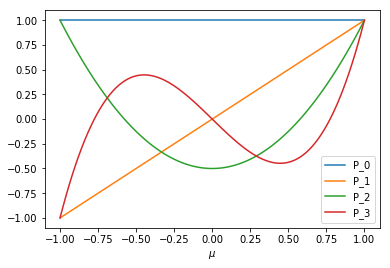

In [50]:
P0 = lambda x: x**0
P1 = lambda x: x
P2 = lambda x: 0.5*(3*x**2 - 1)
P3 = lambda x: 0.5*(5*x**3 - 3*x)

x_plot = np.linspace(-1, 1, 100)
plt.plot(x_plot, P0(x_plot), 
         x_plot, P1(x_plot),
         x_plot, P2(x_plot),
         x_plot, P3(x_plot));
plt.xlabel('$\mu$')
plt.legend(['P_0', 'P_1', 'P_2', 'P_3'])

In [51]:
from scipy.integrate import quad
# demonstrate orthogonality

In [52]:
# demonstrate expansion of P(mu) 

# Exercises

## Exercise 1

Prove the following

  - $\cos(\theta) = \frac{A \cos(\theta_c) + 1}{\sqrt{A^2 +2A\cos(\theta_c) +1}}$
  - $E'/E = \frac{1+\alpha + (1-\alpha)\cos(\theta_c)}{2}$
  - For isotropic scattering in CM, the average of the cosing of the LAB scattering angle is defined by $\bar{\mu} = \frac{2}{3A}$.
  
## Exercise 2

Assume elastic scattering of neutrons off hydrogen is isotropic in the CM system.  Derive $P(\theta)$ for LAB frame.  Then, compute the zeroth, first, second, and third Legendre representations of $P(\theta)$.  Plot the $P(\theta)$ and these four approximations together on one graph.